Получите базовое решение:

Сделайте минимальные преобразования

Обучите модель

Выберете и посчитайте метрику качества
****
Разбейте данные на обучение и тест

Проведите балансировку данных минимум тремя методами

Обучите модель классификации с целевым признаком Class

Оцените подходящие метрики качества

Сформулируйте выводы по проделанной работе


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, PrecisionRecallDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()
!unzip '/content/archive (2).zip'

Saving archive (2).zip to archive (2).zip
Archive:  /content/archive (2).zip
  inflating: creditcard.csv          


In [23]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



****
Первичный анализ

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

****
Базовая модель

In [8]:
x = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=2)
x_train.shape, x_test.shape

((227845, 29), (56962, 29))

In [9]:
base = data.copy()

class DataPipline(BaseEstimator, TransformerMixin):

  def __init__(self, data):

    self.quantile_85 = {}
    self.quantile_15 = {}

  def fit(self, data, y=None):

    for col in data.columns:
      self.quantile_85[col] = data[col].quantile(0.85)
      self.quantile_15[col] = data[col].quantile(0.15)

    return self

  def transform(self, data, y=None):
    data = data.copy()

    for col in data.columns:
      data.loc[data[col] > self.quantile_85[col], col] = self.quantile_85[col]
      data.loc[data[col] < self.quantile_15[col], col] = self.quantile_15[col]

    return data



In [10]:
pipe_base = make_pipeline(
    DataPipline(data=base)
)

x_train_base = pipe_base.fit_transform(x_train)
x_test_base = pipe_base.transform(x_test)


              precision    recall  f1-score   support

           0      1.000     1.000     1.000     56869
           1      0.806     0.849     0.827        93

    accuracy                          0.999     56962
   macro avg      0.903     0.925     0.913     56962
weighted avg      0.999     0.999     0.999     56962

PR-AUC: 0.824


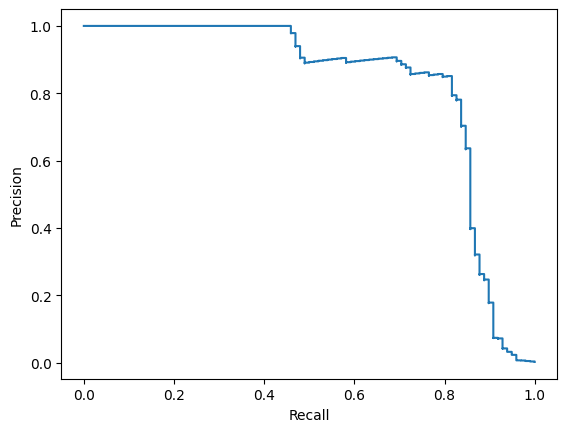

In [11]:
model_base = LogisticRegression()
model_base.fit(x_train_base, y_train)

print(classification_report(model_base.predict(x_test_base), y_test, digits=3))

precision, recall, thresholds = precision_recall_curve(y_test, model_base.predict_proba(x_test_base)[:, 1])

PrecisionRecallDisplay(precision=precision, recall=recall).plot()

print('PR-AUC:', round(auc(recall, precision), 3))

****
Балансировка данных

In [12]:
y_train.value_counts(normalize=True)

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

**OverSmapling, UnderSampling**

<img src='https://drive.google.com/uc?id=1w_D0t6-0NlAFzmN0DDtoHM-uZ4BTXMgS'>



**OverSampling - SMOTE**

<img src='https://drive.google.com/uc?id=1nwOZ0tucOSNv7k2M8EAD1diFclc6YMtc'>


**UnderSampling - Tomek Links**

<img src='https://drive.google.com/uc?id=1Jcn9FsJd1saGKP42aW6fsS9LvruZ0ZaP'>


In [ ]:
def balance_class(data, target_idx, method='not'):
    assert method in ['not', 'over', 'under', 'smote', 'tomek'], 'Выберите правильный метод сэмплирования'

       # Переводим столбец таргета в целое число и считаем количество классов
    data[target_idx] = data[target_idx].astype(int)
    target_counts = data[target_idx].value_counts()

    max_class = target_counts.idxmax()
    min_class = target_counts.idxmin()

       #Во сколько раз большего больше чем меньшего
    dis_coef = int(target_counts[max_class] / target_counts[min_class]) - 1

    if method == 'not':
        return data.sample(frac=1).reset_index(drop=True)

    if method == 'over':
          #Увеличиваем данные меньшего класса

        for i in range(dis_coef):
            sample = data[data[target_idx] == min_class].sample(target_counts[min_class], replace=True)
            data = pd.concat([data, sample], ignore_index=True)

    elif method == 'under':
          #Урезаем данные большего класса

        data_min = data[data[target_idx] == min_class]
        data_max = data[data[target_idx] == max_class]
        data_max_sampled = data_max.sample(target_counts[min_class])
        data = pd.concat([data_min, data_max_sampled], ignore_index=True)

    elif method == 'smote':
          #Создаем соседей

        smote = SMOTE()
        x_smote, y_smote = smote.fit_resample(data.drop(columns=target_idx), data[target_idx])
        data = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote, columns=[target_idx])], axis=1)

    elif method == 'tomek':
          #Переманиваем соседей

        tomek = TomekLinks()
        x_tomek, y_tomek = tomek.fit_resample(data.drop(columns=target_idx), data[target_idx])
        data = pd.concat([pd.DataFrame(x_tomek), pd.DataFrame(y_tomek, columns=[target_idx])], axis=1)

    return data.sample(frac=1).reset_index(drop=True)

In [ ]:
def get_metrics(report):
    f1_macro = report['macro avg']['f1-score']
    f1_0 = report['0']['f1-score']
    f1_1 = report['1']['f1-score']
    return f1_macro, f1_0, f1_1

def hunting(data_balanced, target_name, x_test, y_test, method='not'):
    assert method in ['not', 'over', 'under', 'smote', 'tomek'], 'Выберите правильный метод сэмплирования'

    x_train = data_balanced.drop(target_name, axis=1)
    y_train = data_balanced[target_name]

    model_lr = LogisticRegression()
    model_lr.fit(x_train, y_train)

    pred_train = model_lr.predict(x_train)
    pred_test = model_lr.predict(x_test)

    report_train = classification_report(y_train, pred_train, output_dict=True)
    report_test = classification_report(y_test, pred_test, output_dict=True)
    f1_macro_train, f1_0_train, f1_1_train = get_metrics(report_train)
    f1_macro_test, f1_0_test, f1_1_test = get_metrics(report_test)

    stata = {
        'f1_macro_train': f1_macro_train,
        'f1_macro_test': f1_macro_test,
        'f1_0_train': f1_0_train,
        'f1_0_test': f1_0_test,
        'f1_1_train': f1_1_train,
        'f1_1_test': f1_1_test,
        'method': method
    }

    return stata, model_lr

In [24]:
data = data.drop('Time', axis=1)

variance = ['not', 'over', 'under', 'tomek', 'smote']
target_name = 'Class'

x_train, y_train = data.drop(target_name, axis=1), data[target_name]
x_test, y_test = x_train.copy(), y_train.copy()

stata = pd.DataFrame()

for method in variance:
    print(method)
    data_for_balanced = x_train.copy()
    data_for_balanced[target_name] = y_train
    data_balanced = balance_class(data_for_balanced, target_name, method=method)
    print(data_balanced[target_name].value_counts())

    stata_not_balanced, model_not_balanced = hunting(data_balanced, target_name, x_test, y_test, method=method)
    stata = pd.concat([stata, pd.DataFrame([stata_not_balanced])], ignore_index=True)
    print(stata)
    print('\n', '_'*20)

not
Class
0    284315
1       492
Name: count, dtype: int64
   f1_macro_train  f1_macro_test  f1_0_train  f1_0_test  f1_1_train  \
0        0.865881       0.865881    0.999597   0.999597    0.732164   

   f1_1_test method  
0   0.732164    not  

 ____________________
over
Class
0    284315
1    283884
Name: count, dtype: int64
   f1_macro_train  f1_macro_test  f1_0_train  f1_0_test  f1_1_train  \
0        0.865881       0.865881    0.999597   0.999597    0.732164   
1        0.943074       0.543240    0.944752   0.985653    0.941397   

   f1_1_test method  
0   0.732164    not  
1   0.100827   over  

 ____________________
under
Class
1    492
0    492
Name: count, dtype: int64
   f1_macro_train  f1_macro_test  f1_0_train  f1_0_test  f1_1_train  \
0        0.865881       0.865881    0.999597   0.999597    0.732164   
1        0.943074       0.543240    0.944752   0.985653    0.941397   
2        0.958306       0.526141    0.959366   0.979123    0.957247   

   f1_1_test method  
0  

In [27]:
stata.sort_values('f1_1_test', ascending=False)

,f1_macro_train,f1_macro_test,f1_0_train,f1_0_test,f1_1_train,f1_1_test,method
0,0.865881,0.865881,0.999597,0.999597,0.732164,0.732164,not
3,0.865277,0.864408,0.999603,0.999599,0.730952,0.729216,tomek
4,0.958636,0.569020,0.959598,0.990792,0.957675,0.147247,smote
1,0.943074,0.543240,0.944752,0.985653,0.941397,0.100827,over
2,0.958306,0.526141,0.959366,0.979123,0.957247,0.073159,under


****
Выводы
****
В этом датафрейме лучше всего не сэмплировать данные таргета.

Андэр сэмплирование заняло последнюю строчку. Не стоит сэмплировать данные таким образом, когда одного класса в сотни больше другого (+ переобучилась)

Томек тоже хорошо показал себя, потому что почти не урезал данные. Тем самым был близок выборкой к методу 'not'

Овер/Смот сэмплинг - переобучились
